## Pair Statistics Agulhas

Here we make 

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

In [2]:
import matplotlib
font = {'family' : 'Sans',
        #'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

In [3]:
import pair_statistics_module as psm

In [4]:
# Use cell if wanting to reload modules while developing
import importlib
importlib.reload(psm)

<module 'pair_statistics_module' from '/home/dbalwada/GDP-earthcube-meeting-2022/pair_statistics_module.py'>

In [5]:
filt_flag = 1

In [6]:
if filt_flag==1:
    #fname_extension = 'with_filtered_lon_-70_to_-30_lat_20_to_30.nc'
    fname_extension = 'with_filtered_lon_-50_to_-25_lat_20_to_30.nc'
    ds = xr.open_dataset('data/gdp_subset_'+ fname_extension)
else:
    fname_extension = 'lon_-70_to_-30_lat_20_to_30.nc'
    ds = xr.open_dataset('data/gdp_subset_'+fname_extension)

In [7]:
ds.load()

<xarray.Dataset>
Dimensions:                (traj: 652, obs: 3614276)
Coordinates:
    ID                     (traj) int64 6070 6788 7139 ... 67208590 67209360
    lon                    (obs) float32 -25.01 -25.02 -25.03 ... -44.2 -44.2
    lat                    (obs) float32 23.77 23.77 23.77 ... 29.97 29.98 30.0
    time                   (obs) datetime64[ns] 2003-01-08T14:00:00 ... 2019-...
    ids                    (obs) int64 6070 6070 6070 ... 67209360 67209360
Dimensions without coordinates: traj, obs
Data variables: (12/56)
    rowsize                (traj) int64 9597 10001 18667 ... 10166 10073 10019
    location_type          (traj) int8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
    WMO                    (traj) int32 1300517 4100552 ... 1402559 6203708
    expno                  (traj) int32 9325 6129 9435 9435 ... 2222 2222 2222
    deploy_date            (traj) datetime64[ns] 2002-09-06 ... 2019-02-08
    deploy_lon             (traj) float32 -17.7 -40.0 -18.3 ... -48.9 -46.1
    ...                     ...
    err_sst2               (obs) float32 0.039 0.023 0.018 ... 0.013 0.012 0.012
    flg_sst                (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5
    flg_sst1               (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5
    flg_sst2               (obs) int8 2 4 4 4 4 4 4 4 4 2 ... 5 5 5 5 5 2 2 5 5
    u_lp                   (obs) float64 -0.186 -0.1838 ... -0.1172 -0.121
    v_lp                   (obs) float64 -0.005962 -0.008717 ... 0.2933 0.2971
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

(array([2004721.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1609555.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

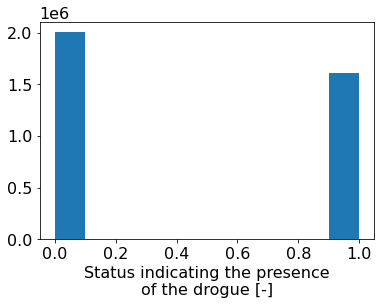

In [8]:
ds.drogue_status.plot.hist()

(array([ 17198.,  54781., 136996., 329926., 421999., 404665., 829989.,
        602510., 322905., 493307.]),
 array([2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016.,
        2018., 2020.]),
 <BarContainer object of 10 artists>)

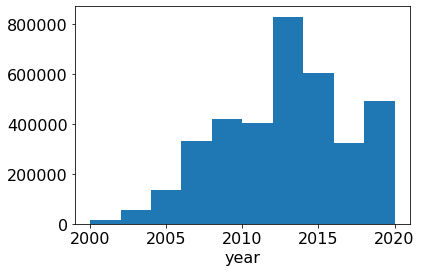

In [9]:
ds.time.dt.year.plot.hist()

(array([296439., 263940., 289816., 297470., 303192., 291895., 303554.,
        313928., 302433., 327608., 314574., 309427.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

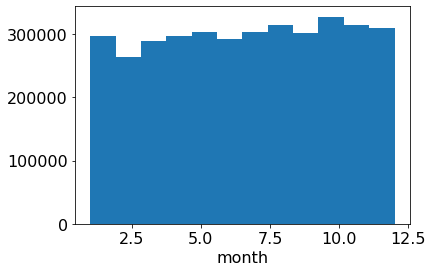

In [10]:
ds.time.dt.month.plot.hist(bins=12)

In [11]:
ds_drogued = ds.where(ds.drogue_status==1, drop=True)

In [51]:
ds

<xarray.Dataset>
Dimensions:                (traj: 652, obs: 3614276)
Coordinates:
    ID                     (traj) int64 6070 6788 7139 ... 67208590 67209360
    lon                    (obs) float32 -25.01 -25.02 -25.03 ... -44.2 -44.2
    lat                    (obs) float32 23.77 23.77 23.77 ... 29.97 29.98 30.0
    time                   (obs) datetime64[ns] 2003-01-08T14:00:00 ... 2019-...
    ids                    (obs) int64 6070 6070 6070 ... 67209360 67209360
Dimensions without coordinates: traj, obs
Data variables: (12/56)
    rowsize                (traj) int64 9597 10001 18667 ... 10166 10073 10019
    location_type          (traj) int8 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 1 1 1 1 1 1
    WMO                    (traj) int32 1300517 4100552 ... 1402559 6203708
    expno                  (traj) int32 9325 6129 9435 9435 ... 2222 2222 2222
    deploy_date            (traj) datetime64[ns] 2002-09-06 ... 2019-02-08
    deploy_lon             (traj) float32 -17.7 -40.0 -18.3 ... -48.9 -46.1
    ...                     ...
    err_sst2               (obs) float32 0.039 0.023 0.018 ... 0.013 0.012 0.012
    flg_sst                (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5
    flg_sst1               (obs) int8 5 5 5 5 5 5 5 5 5 5 ... 5 5 5 5 5 5 5 5 5
    flg_sst2               (obs) int8 2 4 4 4 4 4 4 4 4 2 ... 5 5 5 5 5 2 2 5 5
    u_lp                   (obs) float64 -0.186 -0.1838 ... -0.1172 -0.121
    v_lp                   (obs) float64 -0.005962 -0.008717 ... 0.2933 0.2971
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [12]:
ds_drogued

<xarray.Dataset>
Dimensions:                (traj: 652, obs: 1609555)
Coordinates:
    ID                     (traj) int64 6070 6788 7139 ... 67208590 67209360
    lon                    (obs) float32 -25.01 -25.02 -25.03 ... -38.75 -38.74
    lat                    (obs) float32 23.77 23.77 23.77 ... 27.57 27.57 27.57
    time                   (obs) datetime64[ns] 2003-01-08T14:00:00 ... 2019-...
    ids                    (obs) int64 6070 6070 6070 ... 67209360 67209360
Dimensions without coordinates: traj, obs
Data variables: (12/56)
    rowsize                (traj, obs) float64 9.597e+03 9.597e+03 ... 1.002e+04
    location_type          (traj, obs) float64 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0
    WMO                    (traj, obs) float64 1.301e+06 1.301e+06 ... 6.204e+06
    expno                  (traj, obs) float64 9.325e+03 9.325e+03 ... 2.222e+03
    deploy_date            (traj, obs) datetime64[ns] 2002-09-06 ... 2019-02-08
    deploy_lon             (traj, obs) float32 -17.7 -17.7 -17.7 ... -46.1 -46.1
    ...                     ...
    err_sst2               (obs) float32 0.039 0.023 0.018 ... 0.019 0.02 0.021
    flg_sst                (obs) float64 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0
    flg_sst1               (obs) float64 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0
    flg_sst2               (obs) float64 2.0 4.0 4.0 4.0 4.0 ... 5.0 5.0 2.0 5.0
    u_lp                   (obs) float64 -0.186 -0.1838 ... 0.01726 0.01822
    v_lp                   (obs) float64 -0.005962 -0.008717 ... 0.009656
Attributes: (12/15)
    title:             Global Drifter Program hourly drifting buoy collection
    history:           Version 2.00.  Metadata from dirall.dat and deplog.dat
    Conventions:       CF-1.6
    date_created:      2022-06-27T13:53:17.908246
    publisher_name:    GDP Drifter DAC
    publisher_email:   aoml.dftr@noaa.gov
    ...                ...
    metadata_link:     https://www.aoml.noaa.gov/phod/dac/dirall.html
    contributor_name:  NOAA Global Drifter Program
    contributor_role:  Data Acquisition Center
    institution:       NOAA Atlantic Oceanographic and Meteorological Laboratory
    acknowledgement:   Elipot et al. (2022) to be submitted. Elipot et al. (2...
    summary:           Global Drifter Program hourly data

In [13]:
np.unique(ds_drogued.ids).shape

(384,)

In [14]:
dul = np.array([])
dut = np.array([])
dist = np.array([])
time_pair = np.array([]).astype('datetime64')
if filt_flag==1:
    dul_lp = np.array([])
    dut_lp = np.array([])
    dul_hp = np.array([])
    dut_hp = np.array([])

In [15]:
%%time 
## takes about 15 mins, but time scale roughly linearly wiht number of samples
for year in range(2000, 2021):
    print(year)
    #ds_yr = psm.retrieve_year(ds, year)
    ds_yr = psm.retrieve_year(ds_drogued, year)
    trajs = psm.ds2trajstruct(ds_yr, filt_flag)
    
    if filt_flag==0:
        traj_arrays = {}
        traj_arrays['lon_array'], traj_arrays['lat_array'] = psm.trajstruct2posarrays(trajs, year)
        traj_arrays['u_array'], traj_arrays['v_array'] = psm.trajstruct2velarrays(trajs, year, vel_type='full')
        timepairs = psm.trajarrays2timepairs(traj_arrays, year)
        dul_year, dut_year, dist_year, time_year = psm.timepairs2list(timepairs, year)


        dul = np.append(dul, dul_year)
        dut = np.append(dut, dut_year)
        dist = np.append(dist, dist_year)
        time_pair = np.append(time_pair, time_year)
    else:
        traj_arrays = {}
        traj_arrays['lon_array'], traj_arrays['lat_array'] = psm.trajstruct2posarrays(trajs, year)
        traj_arrays['u_array'], traj_arrays['v_array'] = psm.trajstruct2velarrays(trajs, year, vel_type='full')
        traj_arrays['u_lp_array'], traj_arrays['v_lp_array'] = psm.trajstruct2velarrays(trajs, year, vel_type='lp')
        #traj_arrays['u_array'], traj_arrays['v_array'] = psm.trajstruct2velarrays(trajs, year, vel_type='full')
        traj_arrays['u_hp_array'] = traj_arrays['u_array'] - traj_arrays['u_lp_array']
        traj_arrays['v_hp_array'] = traj_arrays['v_array'] - traj_arrays['v_lp_array']
        
        timepairs = psm.trajarrays2timepairs(traj_arrays, year, filt_flag)
        
        dul_year, dut_year, dist_year, time_year, dul_lp_year, dut_lp_year, dul_hp_year, dut_hp_year = psm.timepairs2list(timepairs, year, filt_flag)
        
        dul = np.append(dul, dul_year)
        dut = np.append(dut, dut_year)
        dul_lp = np.append(dul_lp, dul_lp_year)
        dut_lp = np.append(dut_lp, dut_lp_year)
        dul_hp = np.append(dul_hp, dul_hp_year)
        dut_hp = np.append(dut_hp, dut_hp_year)
        dist = np.append(dist, dist_year)
        time_pair = np.append(time_pair, time_year)


2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
CPU times: user 25min 32s, sys: 11min 34s, total: 37min 6s
Wall time: 37min 4s


In [16]:
ds_pairs = xr.Dataset()

ds_pairs['dul'] = xr.DataArray(dul, dims=['pairs'])
ds_pairs['dut'] = xr.DataArray(dut, dims=['pairs'])
ds_pairs['dist'] = xr.DataArray(dist, dims=['pairs'])
ds_pairs['time_pair'] = xr.DataArray(time_pair, dims=['pairs'])

if filt_flag==1:
    ds_pairs['dul_lp'] = xr.DataArray(dul_lp, dims=['pairs'])
    ds_pairs['dut_lp'] = xr.DataArray(dut_lp, dims=['pairs'])
    ds_pairs['dul_hp'] = xr.DataArray(dul_hp, dims=['pairs'])
    ds_pairs['dut_hp'] = xr.DataArray(dut_hp, dims=['pairs'])

In [17]:
ds_pairs

<xarray.Dataset>
Dimensions:    (pairs: 22724775)
Dimensions without coordinates: pairs
Data variables:
    dul        (pairs) float64 0.09014 0.07905 0.0804 ... 0.08389 -0.02912
    dut        (pairs) float64 0.01023 0.06813 0.07366 ... 0.2195 0.04866 0.2477
    dist       (pairs) float64 2.165e+06 2.167e+06 ... 5.817e+05 1.042e+06
    time_pair  (pairs) datetime64[ns] 2001-11-13T14:00:00 ... 2020-04-06T03:0...
    dul_lp     (pairs) float64 -0.02092 -0.01927 -0.01761 ... 0.008248 -0.007313
    dut_lp     (pairs) float64 0.163 0.1622 0.1614 ... 0.05238 0.02966 0.07933
    dul_hp     (pairs) float64 0.1111 0.09832 0.09801 ... 0.07565 -0.0218
    dut_hp     (pairs) float64 -0.1527 -0.09409 -0.0877 ... 0.1671 0.019 0.1684

In [18]:
ds_pairs.to_netcdf('data/pairs_'+fname_extension)

## Raw plots 
To see if everything looks alright.

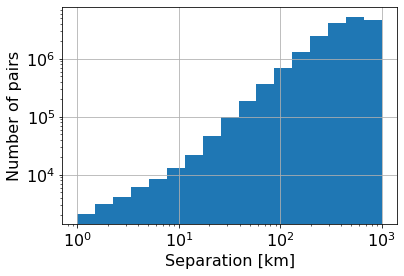

In [19]:
plt.hist(dist/1e3, bins=np.logspace(0, 3, 18));
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Separation [km]')
plt.ylabel('Number of pairs')
plt.grid()


In [20]:
dist_bin = np.logspace(3, 6, 12)
dist_axis = 0.5*(dist_bin[:-1] + dist_bin[1:])
len_dist_axis = len(dist_axis)

In [21]:
pairs_dist = [psm.structtype() for i in range(len_dist_axis)]

In [22]:
for i in  range(len_dist_axis): 
    id = np.logical_and(ds_pairs.dist>dist_bin[i], 
                        ds_pairs.dist<=dist_bin[i+1])
    pairs_dist[i].dul = ds_pairs['dul'][id]
    pairs_dist[i].dut = ds_pairs['dut'][id]
    pairs_dist[i].time = ds_pairs.time_pair[id]
    
    if filt_flag==1:
        pairs_dist[i].dul_lp = ds_pairs['dul_lp'][id]
        pairs_dist[i].dut_lp = ds_pairs['dut_lp'][id]
            
        pairs_dist[i].dul_hp = ds_pairs['dul_hp'][id]
        pairs_dist[i].dut_hp = ds_pairs['dut_hp'][id]    

In [23]:
SF2_ll = np.NaN*np.ones_like(dist_axis)
SF2_tt = np.NaN*np.ones_like(dist_axis)

SF2_ll_lp = np.NaN*np.ones_like(dist_axis)
SF2_tt_lp = np.NaN*np.ones_like(dist_axis)

SF2_ll_hp = np.NaN*np.ones_like(dist_axis)
SF2_tt_hp = np.NaN*np.ones_like(dist_axis)

SF3_lll = np.NaN*np.ones_like(dist_axis)
SF3_ltt = np.NaN*np.ones_like(dist_axis)
n = np.NaN*np.ones_like(dist_axis)

for i in range(len(dist_axis)): 
    
    
    SF2_ll[i] = np.nanmean(pairs_dist[i].dul**2)
    SF2_tt[i] = np.nanmean(pairs_dist[i].dut**2)
    
    SF2_ll_lp[i] = np.nanmean(pairs_dist[i].dul_lp**2)
    SF2_tt_lp[i] = np.nanmean(pairs_dist[i].dut_lp**2)
    
    SF2_ll_hp[i] = np.nanmean(pairs_dist[i].dul_hp**2)
    SF2_tt_hp[i] = np.nanmean(pairs_dist[i].dut_hp**2)    
    
    SF3_lll[i] = np.nanmean(pairs_dist[i].dul**3)
    SF3_ltt[i] = np.nanmean(pairs_dist[i].dul*(pairs_dist[i].dut**2))
    

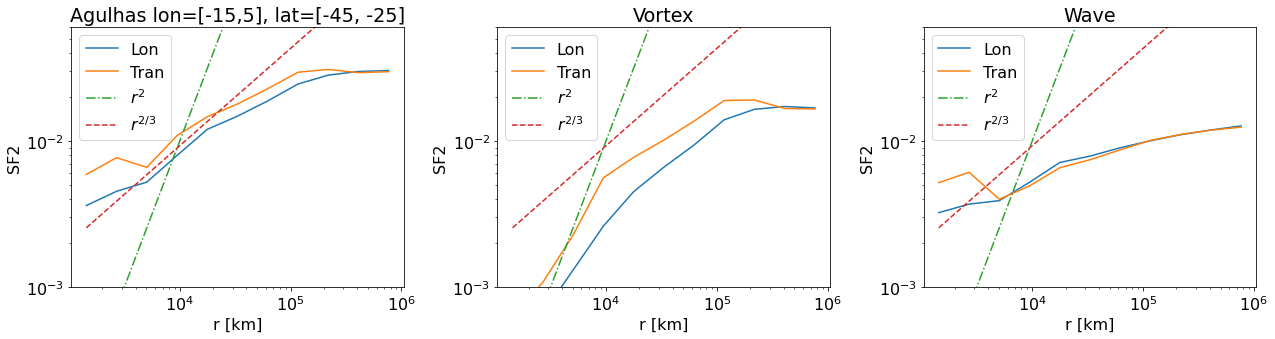

In [24]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.plot(dist_axis, SF2_ll, label='Lon')
plt.plot(dist_axis, SF2_tt, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,6e-2])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')


plt.subplot(132)
plt.plot(dist_axis, SF2_ll_lp, label='Lon')
plt.plot(dist_axis, SF2_tt_lp, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,6e-2])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Vortex')

plt.subplot(133)
plt.plot(dist_axis, SF2_ll_hp, label='Lon')
plt.plot(dist_axis, SF2_tt_hp, label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,6e-2])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Wave')

#plt.savefig('SF2_Agulhas.png')
plt.tight_layout()

In [25]:
# Rotational-diverget
SF2_rr, SF2_dd = psm.helmholtz_decompose( dist_axis, SF2_ll, SF2_tt )
SF2_rr_lp, SF2_dd_lp = psm.helmholtz_decompose( dist_axis, SF2_ll_lp, SF2_tt_lp )
SF2_rr_hp, SF2_dd_hp = psm.helmholtz_decompose( dist_axis, SF2_ll_hp, SF2_tt_hp )

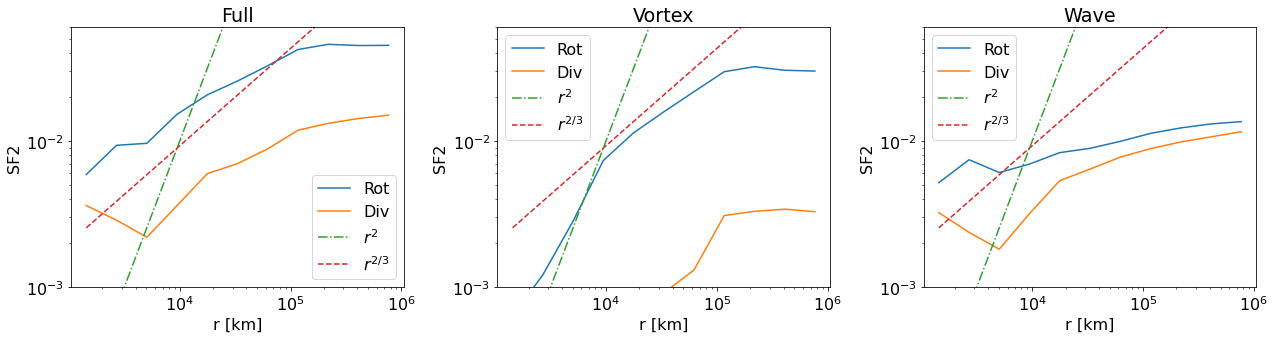

In [26]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.plot(dist_axis, SF2_rr, label='Rot')
plt.plot(dist_axis, SF2_dd, label='Div')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,6e-2])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Full')


plt.subplot(132)
plt.plot(dist_axis, SF2_rr_lp, label='Rot')
plt.plot(dist_axis, SF2_dd_lp, label='Div')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,6e-2])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Vortex')

plt.subplot(133)
plt.plot(dist_axis, SF2_rr_hp, label='Rot')
plt.plot(dist_axis, SF2_dd_hp, label='Div')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,6e-2])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Wave')

#plt.savefig('SF2_Agulhas.png')
plt.tight_layout()

Text(0.5, 1.0, 'Divergent')

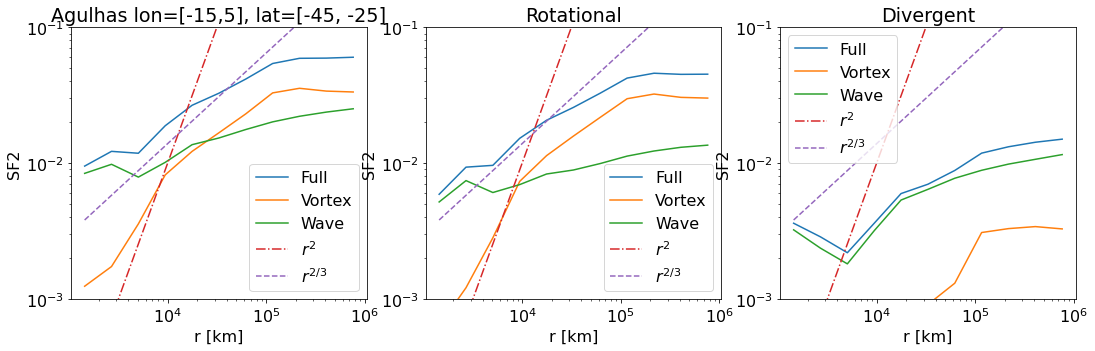

In [27]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.plot(dist_axis, SF2_ll+SF2_tt, label='Full')
plt.plot(dist_axis, SF2_ll_lp+SF2_tt_lp, label='Vortex')
plt.plot(dist_axis, SF2_ll_hp+SF2_tt_hp, label='Wave')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')


plt.subplot(132)
plt.plot(dist_axis, SF2_rr, label='Full')
plt.plot(dist_axis, SF2_rr_lp, label='Vortex')
plt.plot(dist_axis, SF2_rr_hp, label='Wave')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Rotational')

plt.subplot(133)
plt.plot(dist_axis, SF2_dd, label='Full')
plt.plot(dist_axis, SF2_dd_lp, label='Vortex')
plt.plot(dist_axis, SF2_dd_hp, label='Wave')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$')
plt.plot(dist_axis, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Divergent')
#plt.savefig('SF2_Agulhas.png')

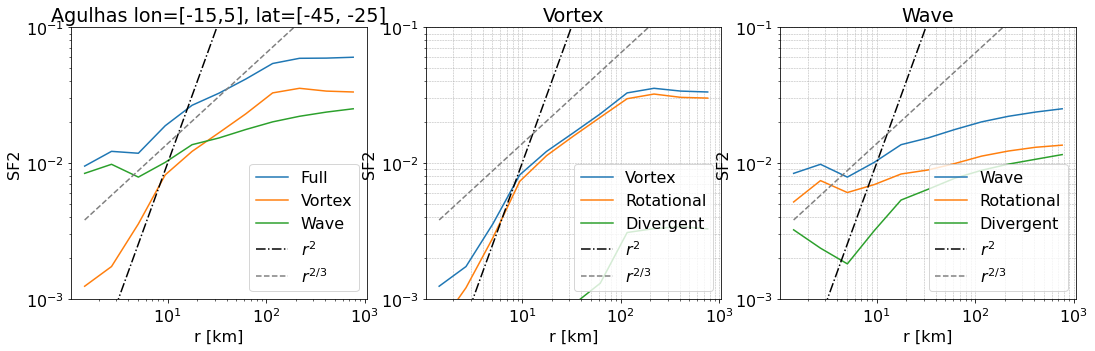

In [28]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.plot(dist_axis/1e3, SF2_ll+SF2_tt, label='Full')
plt.plot(dist_axis/1e3, SF2_ll_lp+SF2_tt_lp, label='Vortex')
plt.plot(dist_axis/1e3, SF2_ll_hp+SF2_tt_hp, label='Wave')

plt.plot(dist_axis/1e3, 1e-10*dist_axis**2, '-.',  label= '$r^2$', color='Black')
plt.plot(dist_axis/1e3, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$', color='Gray')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')


plt.subplot(132)
plt.plot(dist_axis/1e3, SF2_rr_lp + SF2_dd_lp, label='Vortex')
plt.plot(dist_axis/1e3, SF2_rr_lp, label='Rotational')
plt.plot(dist_axis/1e3, SF2_dd_lp, label='Divergent')

plt.plot(dist_axis/1e3, 1e-10*dist_axis**2, '-.',  label= '$r^2$', color='Black')
plt.plot(dist_axis/1e3, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$', color='Gray')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Vortex')
plt.grid(which='both', linewidth=0.5, linestyle='--')

plt.subplot(133)
plt.plot(dist_axis/1e3, SF2_rr_hp + SF2_dd_hp, label='Wave')
plt.plot(dist_axis/1e3, SF2_rr_hp, label='Rotational')
plt.plot(dist_axis/1e3, SF2_dd_hp, label='Divergent')

plt.plot(dist_axis/1e3, 1e-10*dist_axis**2, '-.',  label= '$r^2$', color='Black')
plt.plot(dist_axis/1e3, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$', color='Gray')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Wave')
plt.grid(which='both', linewidth=0.5, linestyle='--')
#plt.savefig('SF2_Agulhas.png')

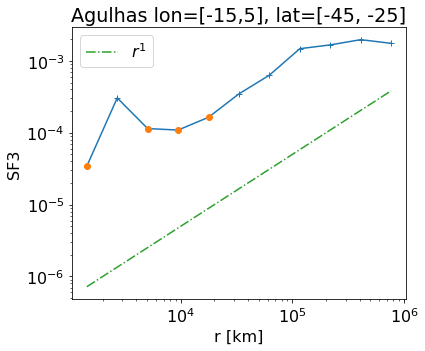

In [29]:
plt.figure(figsize=(6, 5))

plt.plot(dist_axis, np.abs(SF3_lll+SF3_ltt), '+-' )
plt.plot(dist_axis, -(SF3_lll+SF3_ltt) , 'o')
#plt.plot(dist_axis, SF3_ltt, label='Tran')

plt.plot(dist_axis, 5e-10*dist_axis**1, '-.',  label= '$r^1$')
#plt.plot(dist_axis, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$')

plt.xscale('log')
plt.yscale('log')
plt.legend()
#plt.ylim([1e-6,1e-3])
plt.xlabel('r [km]')
plt.ylabel('SF3')
plt.title('Agulhas lon=[-15,5], lat=[-45, -25]')

plt.savefig('SF3_Agulhas.png')

#### Seasonality

In [30]:
#pairs_season_dist = [[psm.structtype() for i in range(len_dist_axis)]]*4
pairs_dist_winter = [psm.structtype() for i in range(len_dist_axis)]
pairs_dist_summer = [psm.structtype() for i in range(len_dist_axis)]

In [31]:
for i in range(len_dist_axis): 
    #for j in range(4):
        id = np.logical_and.reduce( (ds_pairs.dist>dist_bin[i], 
                        ds_pairs.dist<=dist_bin[i+1],
                        ds_pairs.time_pair.dt.month>5,
                        ds_pairs.time_pair.dt.month<=9))
    
    
        pairs_dist_summer[i].dul = ds_pairs['dul'][id]
        pairs_dist_summer[i].dut = ds_pairs['dut'][id]
        if filt_flag==1:
            pairs_dist_summer[i].dul_lp = ds_pairs['dul_lp'][id]
            pairs_dist_summer[i].dut_lp = ds_pairs['dut_lp'][id]
            
            pairs_dist_summer[i].dul_hp = ds_pairs['dul_hp'][id]
            pairs_dist_summer[i].dut_hp = ds_pairs['dut_hp'][id]
        
        #pairs_season_dist[i].time = ds_pairs.time_pair[id]
        
        #print(i)
for i in range(len_dist_axis): 
    #for j in range(4):
        id = np.logical_and.reduce( (ds_pairs.dist>dist_bin[i], 
                        ds_pairs.dist<=dist_bin[i+1],
                        ds_pairs.time_pair.dt.month>0,
                        ds_pairs.time_pair.dt.month<=4))
    
    
        pairs_dist_winter[i].dul = ds_pairs['dul'][id]
        pairs_dist_winter[i].dut = ds_pairs['dut'][id]
        #pairs_season_dist[i].time = ds_pairs.time_pair[id]
        
        if filt_flag==1:
            pairs_dist_winter[i].dul_lp = ds_pairs['dul_lp'][id]
            pairs_dist_winter[i].dut_lp = ds_pairs['dut_lp'][id]
            
            pairs_dist_winter[i].dul_hp = ds_pairs['dul_hp'][id]
            pairs_dist_winter[i].dut_hp = ds_pairs['dut_hp'][id]    
        
        #print(i)

In [32]:
SF2_ll_summer = np.NaN*np.ones_like(dist_axis)
SF2_tt_summer = np.NaN*np.ones_like(dist_axis)

SF2_ll_winter = np.NaN*np.ones_like(dist_axis)
SF2_tt_winter = np.NaN*np.ones_like(dist_axis)

SF2_ll_lp_summer = np.NaN*np.ones_like(dist_axis)
SF2_tt_lp_summer = np.NaN*np.ones_like(dist_axis)

SF2_ll_lp_winter = np.NaN*np.ones_like(dist_axis)
SF2_tt_lp_winter = np.NaN*np.ones_like(dist_axis)

SF2_ll_hp_summer = np.NaN*np.ones_like(dist_axis)
SF2_tt_hp_summer = np.NaN*np.ones_like(dist_axis)

SF2_ll_hp_winter = np.NaN*np.ones_like(dist_axis)
SF2_tt_hp_winter = np.NaN*np.ones_like(dist_axis)

n = np.NaN*np.ones_like(dist_axis)

for i in range(len(dist_axis)): 
     
    SF2_ll_winter[i] = np.nanmean(pairs_dist_winter[i].dul**2)
    SF2_tt_winter[i] = np.nanmean(pairs_dist_winter[i].dut**2)
     
    SF2_ll_summer[i] = np.nanmean(pairs_dist_summer[i].dul**2)
    SF2_tt_summer[i] = np.nanmean(pairs_dist_summer[i].dut**2)
    
    SF2_ll_lp_winter[i] = np.nanmean(pairs_dist_winter[i].dul_lp**2)
    SF2_tt_lp_winter[i] = np.nanmean(pairs_dist_winter[i].dut_lp**2)
     
    SF2_ll_lp_summer[i] = np.nanmean(pairs_dist_summer[i].dul_lp**2)
    SF2_tt_lp_summer[i] = np.nanmean(pairs_dist_summer[i].dut_lp**2)
    
    SF2_ll_hp_winter[i] = np.nanmean(pairs_dist_winter[i].dul_hp**2)
    SF2_tt_hp_winter[i] = np.nanmean(pairs_dist_winter[i].dut_hp**2)
     
    SF2_ll_hp_summer[i] = np.nanmean(pairs_dist_summer[i].dul_hp**2)
    SF2_tt_hp_summer[i] = np.nanmean(pairs_dist_summer[i].dut_hp**2)
    
    

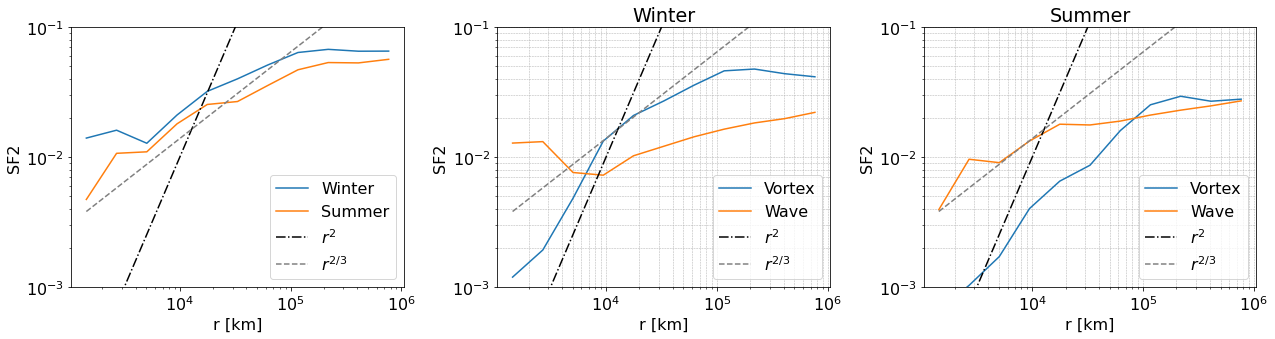

In [33]:
plt.figure(figsize=(18, 5))

plt.subplot(131)
plt.plot(dist_axis, SF2_ll_winter+SF2_tt_winter, label='Winter')
plt.plot(dist_axis, SF2_ll_summer+SF2_tt_summer, label='Summer')
#plt.plot(dist_axis, , label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$', color='Black')
plt.plot(dist_axis, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$', color='Gray')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')

plt.subplot(132)
plt.plot(dist_axis, SF2_ll_lp_winter+SF2_tt_lp_winter, label='Vortex')
plt.plot(dist_axis, SF2_ll_hp_winter+SF2_tt_hp_winter, label='Wave')
#plt.plot(dist_axis, , label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$', color='Black')
plt.plot(dist_axis, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$', color='Gray')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Winter')
plt.grid(which='both', linewidth=0.5, linestyle='--')


plt.subplot(133)
plt.plot(dist_axis, SF2_ll_lp_summer+SF2_tt_lp_summer, label='Vortex')
plt.plot(dist_axis, SF2_ll_hp_summer+SF2_tt_hp_summer, label='Wave')
#plt.plot(dist_axis, , label='Tran')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$', color='Black')
plt.plot(dist_axis, 3e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$', color='Gray')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylim([1e-3,1e-1])
plt.xlabel('r [km]')
plt.ylabel('SF2')
plt.title('Summer')
plt.grid(which='both', linewidth=0.5, linestyle='--')

plt.tight_layout()

## Estimate Errorbars for the raw plots

In [34]:
Ttot = (24*3600)*365*10. # total duration of experiment (data)
Tscale_tot = 1./(((SF2_ll +SF2_tt)**0.5)/dist_axis); # A time scale based on velocity scales
dof = np.ceil(Ttot/Tscale_tot); # this is essentially T_tot/T_scale(r) # how many degrees of freedom can we fit into the total experiment time

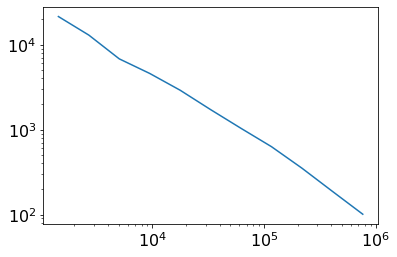

In [35]:
plt.plot(dist_axis, dof)
plt.yscale('log')
plt.xscale('log')

(array([0.05541038, 0.11380984, 0.06692509, 0.09718803]),
 array([ 0.5,  3.5,  6.5,  9.5, 12.5]),
 <BarContainer object of 4 artists>)

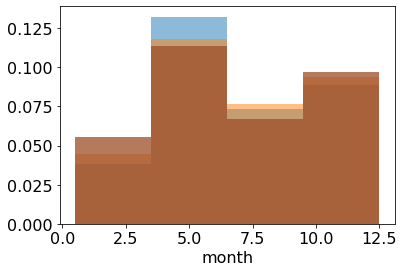

In [36]:
pairs_dist[5].time.dt.month.plot.hist(bins=np.linspace(0.5,12.5,5), density=True, alpha=0.5)
pairs_dist[6].time.dt.month.plot.hist(bins=np.linspace(0.5,12.5,5), density=True, alpha=0.5)
pairs_dist[7].time.dt.month.plot.hist(bins=np.linspace(0.5,12.5,5), density=True, alpha=0.5)
pairs_dist[-4].time.dt.month.plot.hist(bins=np.linspace(0.5,12.5,5), density=True, alpha=0.5)

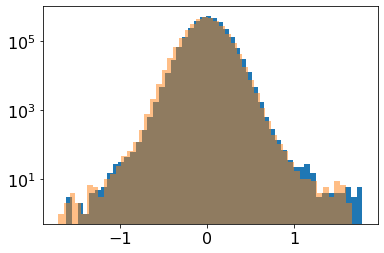

In [37]:
n = 8
plt.hist(pairs_dist[n].dul, bins=51)
plt.hist(pairs_dist[n].dut, bins=51, alpha=0.5)
plt.yscale('log')

In [38]:
npairs_sep = np.NaN*np.ones_like(dist_axis)
nblocks_sep = np.NaN*np.ones_like(dist_axis)
nsamps_per_block_sep = np.NaN*np.ones_like(dist_axis)


for i  in range(len_dist_axis):
    npairs_sep[i]  = len(pairs_dist[i].dul); # how long is the timeseries
    nblocks_sep[i] =  dof[i]#; % number of blocks at that separation (basically the dof)
    nsamps_per_block_sep[i] = np.ceil(npairs_sep[i]/ nblocks_sep[i]);


In [39]:
num_bs_samp = 300

SF2_ll_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
SF2_tt_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
SF2_ll_lp_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
SF2_tt_lp_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
SF2_ll_hp_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
SF2_tt_hp_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))

SF3_bs    = np.NaN*np.ones((len_dist_axis, num_bs_samp))

for i in range(len_dist_axis):
    print(i)
    
    block_size = int(nsamps_per_block_sep[i]);
    nblocks = int(np.floor(npairs_sep[i]/nsamps_per_block_sep[i]));
    
    nmax = (nblocks*block_size);
    
    # make 2 arrays of shape block size X nblocks (some small amount of data is dropped in this step)
    dul_blocks = np.reshape(pairs_dist[i].dul[:nmax].values, (nblocks, block_size));
    dut_blocks = np.reshape(pairs_dist[i].dut[:nmax].values, (nblocks, block_size));
    
    if filt_flag==1:
        dul_lp_blocks = np.reshape(pairs_dist[i].dul_lp[:nmax].values, (nblocks, block_size));
        dut_lp_blocks = np.reshape(pairs_dist[i].dut_lp[:nmax].values, (nblocks, block_size));
    
        dul_hp_blocks = np.reshape(pairs_dist[i].dul_hp[:nmax].values, (nblocks, block_size));
        dut_hp_blocks = np.reshape(pairs_dist[i].dut_hp[:nmax].values, (nblocks, block_size));
    
    
    for j in range(num_bs_samp):
        
        ids = np.random.choice(np.arange(0,nblocks,1), size=nblocks, replace=True)
        
        dul_bs = np.reshape(dul_blocks[ids, :], (-1))
        dut_bs = np.reshape(dut_blocks[ids, :], (-1))
        
        SF2_ll_bs[i,j] = np.nanmean(dul_bs**2)
        SF2_tt_bs[i,j] = np.nanmean(dut_bs**2)
        
        SF3_bs[i,j] = np.nanmean(dul_bs*(dul_bs**2 + dut_bs**2 ) )
        
        if filt_flag==1:
            dul_lp_bs = np.reshape(dul_lp_blocks[ids, :], (-1))
            dut_lp_bs = np.reshape(dut_lp_blocks[ids, :], (-1))

            SF2_ll_lp_bs[i,j] = np.nanmean(dul_lp_bs**2)
            SF2_tt_lp_bs[i,j] = np.nanmean(dut_lp_bs**2)
            
            dul_hp_bs = np.reshape(dul_hp_blocks[ids, :], (-1))
            dut_hp_bs = np.reshape(dut_hp_blocks[ids, :], (-1))

            SF2_ll_hp_bs[i,j] = np.nanmean(dul_hp_bs**2)
            SF2_tt_hp_bs[i,j] = np.nanmean(dut_hp_bs**2)
            
            

0
1
2
3
4
5
6
7
8
9
10


In [40]:
SF2_ll_mean = np.nanmean(SF2_ll_bs, axis=1)
SF2_ll_ci = np.nanpercentile(SF2_ll_bs, [1,99], axis=1)
SF2_tt_mean = np.nanmean(SF2_tt_bs, axis=1)
SF2_tt_ci = np.nanpercentile(SF2_tt_bs, [1,99], axis=1)
SF2_tot_mean = np.nanmean(SF2_ll_bs + SF2_tt_bs, axis=1)
SF2_tot_ci = np.nanpercentile(SF2_ll_bs + SF2_tt_bs, [1,99], axis=1)

SF2_ll_lp_mean = np.nanmean(SF2_ll_lp_bs, axis=1)
SF2_ll_lp_ci = np.nanpercentile(SF2_ll_lp_bs, [1,99], axis=1)
SF2_tt_lp_mean = np.nanmean(SF2_tt_lp_bs, axis=1)
SF2_tt_lp_ci = np.nanpercentile(SF2_tt_lp_bs, [1,99], axis=1)
SF2_tot_lp_mean = np.nanmean(SF2_ll_lp_bs + SF2_tt_lp_bs, axis=1)
SF2_tot_lp_ci = np.nanpercentile(SF2_ll_lp_bs + SF2_tt_lp_bs, [1,99], axis=1)

SF2_ll_hp_mean = np.nanmean(SF2_ll_hp_bs, axis=1)
SF2_ll_hp_ci = np.nanpercentile(SF2_ll_hp_bs, [1,99], axis=1)
SF2_tt_hp_mean = np.nanmean(SF2_tt_hp_bs, axis=1)
SF2_tt_hp_ci = np.nanpercentile(SF2_tt_hp_bs, [1,99], axis=1)
SF2_tot_hp_mean = np.nanmean(SF2_ll_hp_bs + SF2_tt_hp_bs, axis=1)
SF2_tot_hp_ci = np.nanpercentile(SF2_ll_hp_bs + SF2_tt_hp_bs, [1,99], axis=1)

SF3_mean = np.nanmean(SF3_bs, axis=1)
SF3_ci = np.nanpercentile(SF3_bs, [1,99], axis=1)

In [41]:
SF2_rr_bs = np.zeros_like(SF2_ll_bs)
SF2_dd_bs = np.zeros_like(SF2_ll_bs)

SF2_rr_lp_bs = np.zeros_like(SF2_ll_bs)
SF2_dd_lp_bs = np.zeros_like(SF2_ll_bs)

SF2_rr_hp_bs = np.zeros_like(SF2_ll_bs)
SF2_dd_hp_bs = np.zeros_like(SF2_ll_bs)

for i in range(num_bs_samp):
    
    SF2_rr_bs[:, i], SF2_dd_bs[:, i] = psm.helmholtz_decompose( dist_axis, SF2_ll_bs[:,i], SF2_tt_bs[:,i] )
    
    SF2_rr_lp_bs[:, i], SF2_dd_lp_bs[:, i] = psm.helmholtz_decompose( dist_axis, SF2_ll_lp_bs[:,i], SF2_tt_lp_bs[:,i] )
    SF2_rr_hp_bs[:, i], SF2_dd_hp_bs[:, i] = psm.helmholtz_decompose( dist_axis, SF2_ll_hp_bs[:,i], SF2_tt_hp_bs[:,i] )
    

In [42]:
SF2_rr_mean = np.nanmean(SF2_rr_bs, axis=1)
SF2_rr_ci = np.nanpercentile(SF2_rr_bs, [1,99], axis=1)

SF2_dd_mean = np.nanmean(SF2_dd_bs, axis=1)
SF2_dd_ci = np.nanpercentile(SF2_dd_bs, [1,99], axis=1)

SF2_rr_lp_mean = np.nanmean(SF2_rr_lp_bs, axis=1)
SF2_rr_lp_ci = np.nanpercentile(SF2_rr_lp_bs, [1,99], axis=1)

SF2_dd_lp_mean = np.nanmean(SF2_dd_lp_bs, axis=1)
SF2_dd_lp_ci = np.nanpercentile(SF2_dd_lp_bs, [1,99], axis=1)

SF2_rr_hp_mean = np.nanmean(SF2_rr_hp_bs, axis=1)
SF2_rr_hp_ci = np.nanpercentile(SF2_rr_hp_bs, [1,99], axis=1)

SF2_dd_hp_mean = np.nanmean(SF2_dd_hp_bs, axis=1)
SF2_dd_hp_ci = np.nanpercentile(SF2_dd_hp_bs, [1,99], axis=1)

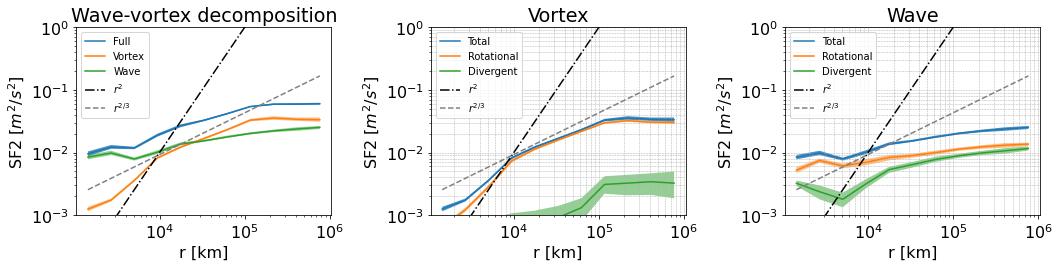

In [52]:
plt.figure(figsize=(15, 4))

plt.subplot(131)
plt.fill_between(dist_axis,SF2_tot_ci[0,:], SF2_tot_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_tot_mean, label='Full')

plt.fill_between(dist_axis,SF2_tot_lp_ci[0,:], SF2_tot_lp_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_tot_lp_mean, label='Vortex')

plt.fill_between(dist_axis,SF2_tot_hp_ci[0,:], SF2_tot_hp_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_tot_hp_mean, label='Wave')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$', color='black')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$', color='gray')

plt.xscale('log')
plt.yscale('log')
plt.legend(prop={'size': 10})
plt.ylim([1e-3,1])
plt.xlabel('r [km]')
plt.ylabel('SF2 [$m^2/s^2$]')
plt.title('Wave-vortex decomposition')

plt.subplot(132)

plt.fill_between(dist_axis,SF2_tot_lp_ci[0,:], SF2_tot_lp_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_tot_lp_mean, label='Total')

plt.fill_between(dist_axis, SF2_rr_lp_ci[0,:], SF2_rr_lp_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_rr_lp_mean, label='Rotational')

plt.fill_between(dist_axis, SF2_dd_lp_ci[0,:], SF2_dd_lp_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_dd_lp_mean, label='Divergent')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$', color='black')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$', color='gray')

plt.xscale('log')
plt.yscale('log')
plt.legend(prop={'size': 10})
plt.ylim([1e-3,1])
plt.xlabel('r [km]')
plt.ylabel('SF2 [$m^2/s^2$]')
plt.title('Vortex')
plt.grid(which='both', linewidth=0.5, linestyle='--')

plt.subplot(133)

plt.fill_between(dist_axis,SF2_tot_hp_ci[0,:], SF2_tot_hp_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_tot_hp_mean, label='Total')

plt.fill_between(dist_axis, SF2_rr_hp_ci[0,:], SF2_rr_hp_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_rr_hp_mean, label='Rotational')

plt.fill_between(dist_axis, SF2_dd_hp_ci[0,:], SF2_dd_hp_ci[1,:], alpha=0.5 )
plt.plot(dist_axis, SF2_dd_hp_mean, label='Divergent')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$', color='black')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$', color='gray')

plt.xscale('log')
plt.yscale('log')
plt.legend(prop={'size': 10} )
plt.ylim([1e-3,1])
plt.xlabel('r [km]')
plt.ylabel('SF2 [$m^2/s^2$]')
plt.title('Wave')
plt.grid(which='both', linewidth=0.5, linestyle='--')

plt.tight_layout()

plt.savefig('SF2_Natl_east_wave_vortex.png')

#### Seasonality (with errorbars)

In [44]:
Ttot = (24*3600)*120*2.5 # total duration of experiment (data)

Tscale_tot = 1./(((SF2_ll_winter +SF2_tt_winter)**0.5)/dist_axis); # A time scale based on velocity scales
dof_winter = np.ceil(Ttot/Tscale_tot); # this is essentially T_tot/T_scale(r) # how many degrees of freedom can we fit into the total experiment time

Tscale_tot = 1./(((SF2_ll_summer +SF2_tt_summer)**0.5)/dist_axis); # A time scale based on velocity scales
dof_summer = np.ceil(Ttot/Tscale_tot); # this is essentially T_tot/T_scale(r) # how many degrees of freedom can we fit into the total experiment time

In [45]:
def bs_samples_SF2(dist_axis, dof, pairs_dist, filt_flag):
    npairs_sep = np.NaN*np.ones_like(dist_axis)
    nblocks_sep = np.NaN*np.ones_like(dist_axis)
    nsamps_per_block_sep = np.NaN*np.ones_like(dist_axis)


    for i  in range(len_dist_axis):
        npairs_sep[i]  = len(pairs_dist[i].dul); # how long is the timeseries
        nblocks_sep[i] =  dof[i]#; % number of blocks at that separation (basically the dof)
        nsamps_per_block_sep[i] = np.ceil(npairs_sep[i]/ nblocks_sep[i]);


    num_bs_samp = 300

    SF2_ll_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
    SF2_tt_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
    SF2_ll_lp_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
    SF2_tt_lp_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
    SF2_ll_hp_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
    SF2_tt_hp_bs = np.NaN*np.ones((len_dist_axis, num_bs_samp))
        
    for i in range(len_dist_axis):
        #print(i)

        block_size = int(nsamps_per_block_sep[i]);
        nblocks = int(np.floor(npairs_sep[i]/nsamps_per_block_sep[i]));

        nmax = (nblocks*block_size);

        # make 2 arrays of shape block size X nblocks (some small amount of data is dropped in this step)
        dul_blocks = np.reshape(pairs_dist[i].dul[:nmax].values, (nblocks, block_size));
        dut_blocks = np.reshape(pairs_dist[i].dut[:nmax].values, (nblocks, block_size));

        if filt_flag==1:
            dul_lp_blocks = np.reshape(pairs_dist[i].dul_lp[:nmax].values, (nblocks, block_size));
            dut_lp_blocks = np.reshape(pairs_dist[i].dut_lp[:nmax].values, (nblocks, block_size));

            dul_hp_blocks = np.reshape(pairs_dist[i].dul_hp[:nmax].values, (nblocks, block_size));
            dut_hp_blocks = np.reshape(pairs_dist[i].dut_hp[:nmax].values, (nblocks, block_size));
     

        for j in range(num_bs_samp):

            ids = np.random.choice(np.arange(0,nblocks,1), size=nblocks, replace=True)

            dul_bs = np.reshape(dul_blocks[ids, :], (-1))
            dut_bs = np.reshape(dut_blocks[ids, :], (-1))

            SF2_ll_bs[i,j] = np.nanmean(dul_bs**2)
            SF2_tt_bs[i,j] = np.nanmean(dut_bs**2)
            
            if filt_flag==1:
                dul_lp_bs = np.reshape(dul_lp_blocks[ids, :], (-1))
                dut_lp_bs = np.reshape(dut_lp_blocks[ids, :], (-1))

                SF2_ll_lp_bs[i,j] = np.nanmean(dul_lp_bs**2)
                SF2_tt_lp_bs[i,j] = np.nanmean(dut_lp_bs**2)

                dul_hp_bs = np.reshape(dul_hp_blocks[ids, :], (-1))
                dut_hp_bs = np.reshape(dut_hp_blocks[ids, :], (-1))

                SF2_ll_hp_bs[i,j] = np.nanmean(dul_hp_bs**2)
                SF2_tt_hp_bs[i,j] = np.nanmean(dut_hp_bs**2)
        
    if filt_flag==0:
        return SF2_ll_bs, SF2_tt_bs
    else:
        return SF2_ll_bs, SF2_tt_bs, SF2_ll_lp_bs, SF2_tt_lp_bs, SF2_ll_hp_bs, SF2_tt_hp_bs

In [46]:
SF2_ll_bs_winter, SF2_tt_bs_winter, SF2_ll_lp_bs_winter, SF2_tt_lp_bs_winter, SF2_ll_hp_bs_winter, SF2_tt_hp_bs_winter = bs_samples_SF2(dist_axis, dof_winter, pairs_dist_winter, filt_flag)
SF2_ll_bs_summer, SF2_tt_bs_summer, SF2_ll_lp_bs_summer, SF2_tt_lp_bs_summer, SF2_ll_hp_bs_summer, SF2_tt_hp_bs_summer = bs_samples_SF2(dist_axis, dof_summer, pairs_dist_summer, filt_flag)


In [47]:
SF2_rr_bs_winter = np.zeros_like(SF2_ll_bs_winter)
SF2_dd_bs_winter = np.zeros_like(SF2_ll_bs_winter)

SF2_rr_bs_summer = np.zeros_like(SF2_ll_bs_summer)
SF2_dd_bs_summer = np.zeros_like(SF2_ll_bs_summer)

num_bs_samp = 100
for i in range(num_bs_samp):
    
    SF2_rr_bs_winter[:, i], SF2_dd_bs_winter[:, i] = psm.helmholtz_decompose( dist_axis, SF2_ll_bs_winter[:,i], SF2_tt_bs_winter[:,i] )
    SF2_rr_bs_summer[:, i], SF2_dd_bs_summer[:, i] = psm.helmholtz_decompose( dist_axis, SF2_ll_bs_summer[:,i], SF2_tt_bs_summer[:,i] )    
    

In [48]:
SF2_ll_winter_mean = np.nanmean(SF2_ll_bs_winter, axis=1)
SF2_ll_winter_ci = np.nanpercentile(SF2_ll_bs_winter, [1,99], axis=1)
SF2_tt_winter_mean = np.nanmean(SF2_tt_bs_winter, axis=1)
SF2_tt_winter_ci = np.nanpercentile(SF2_tt_bs_winter, [1,99], axis=1)
SF2_tot_winter_mean = np.nanmean(SF2_ll_bs_winter+SF2_tt_bs_winter, axis=1)
SF2_tot_winter_ci = np.nanpercentile(SF2_ll_bs_winter+SF2_tt_bs_winter, [1,99], axis=1)

SF2_tot_lp_winter_mean = np.nanmean(SF2_ll_lp_bs_winter+SF2_tt_lp_bs_winter, axis=1)
SF2_tot_lp_winter_ci = np.nanpercentile(SF2_ll_lp_bs_winter+SF2_tt_lp_bs_winter, [1,99], axis=1)
SF2_tot_hp_winter_mean = np.nanmean(SF2_ll_hp_bs_winter+SF2_tt_hp_bs_winter, axis=1)
SF2_tot_hp_winter_ci = np.nanpercentile(SF2_ll_hp_bs_winter+SF2_tt_hp_bs_winter, [1,99], axis=1)


SF2_rr_winter_mean = np.nanmean(SF2_rr_bs_winter, axis=1)
SF2_rr_winter_ci = np.nanpercentile(SF2_rr_bs_winter, [1,99], axis=1)
SF2_dd_winter_mean = np.nanmean(SF2_dd_bs_winter, axis=1)
SF2_dd_winter_ci = np.nanpercentile(SF2_dd_bs_winter, [1,99], axis=1)


SF2_ll_summer_mean = np.nanmean(SF2_ll_bs_summer, axis=1)
SF2_ll_summer_ci = np.nanpercentile(SF2_ll_bs_summer, [1,99], axis=1)
SF2_tt_summer_mean = np.nanmean(SF2_tt_bs_summer, axis=1)
SF2_tt_summer_ci = np.nanpercentile(SF2_tt_bs_summer, [1,99], axis=1)
SF2_tot_summer_mean = np.nanmean(SF2_ll_bs_summer+SF2_tt_bs_summer, axis=1)
SF2_tot_summer_ci = np.nanpercentile(SF2_ll_bs_summer+SF2_tt_bs_summer, [1,99], axis=1)

SF2_tot_lp_summer_mean = np.nanmean(SF2_ll_lp_bs_summer+SF2_tt_lp_bs_summer, axis=1)
SF2_tot_lp_summer_ci = np.nanpercentile(SF2_ll_lp_bs_summer+SF2_tt_lp_bs_summer, [1,99], axis=1)
SF2_tot_hp_summer_mean = np.nanmean(SF2_ll_hp_bs_summer+SF2_tt_hp_bs_summer, axis=1)
SF2_tot_hp_summer_ci = np.nanpercentile(SF2_ll_hp_bs_summer+SF2_tt_hp_bs_summer, [1,99], axis=1)

SF2_rr_summer_mean = np.nanmean(SF2_rr_bs_summer, axis=1)
SF2_rr_summer_ci = np.nanpercentile(SF2_rr_bs_summer, [1,99], axis=1)
SF2_dd_summer_mean = np.nanmean(SF2_dd_bs_summer, axis=1)
SF2_dd_summer_ci = np.nanpercentile(SF2_dd_bs_summer, [1,99], axis=1)



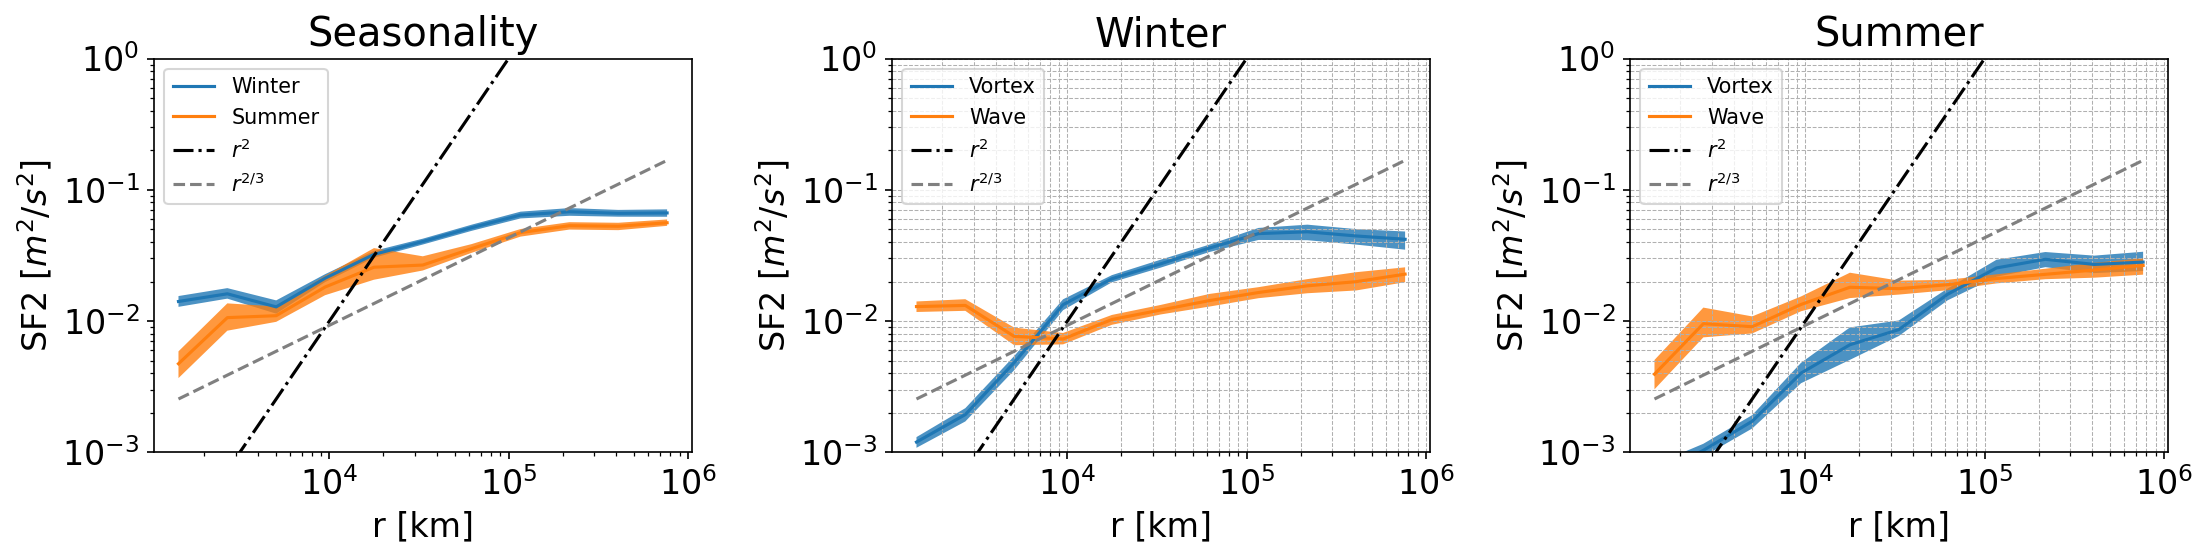

In [49]:
plt.figure(figsize=(15, 4),dpi=150)

plt.subplot(131)
plt.fill_between(dist_axis,SF2_tot_winter_ci[0,:], SF2_tot_winter_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_tot_winter_mean, label='Winter')

plt.fill_between(dist_axis,SF2_tot_summer_ci[0,:], SF2_tot_summer_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_tot_summer_mean, label='Summer')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$', color='black')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$', color='gray')

plt.xscale('log')
plt.yscale('log')
plt.legend(prop={'size': 10})
plt.ylim([1e-3,1])
plt.xlabel('r [km]')
plt.ylabel('SF2 [$m^2/s^2$]')
plt.title('Seasonality')

plt.subplot(132)

plt.fill_between(dist_axis,SF2_tot_lp_winter_ci[0,:], SF2_tot_lp_winter_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_tot_lp_winter_mean, label='Vortex')

plt.fill_between(dist_axis,SF2_tot_hp_winter_ci[0,:], SF2_tot_hp_winter_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_tot_hp_winter_mean, label='Wave')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$', color='black')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$', color='gray')

plt.xscale('log')
plt.yscale('log')
plt.legend(prop={'size': 10})
plt.ylim([1e-3,1])
plt.xlabel('r [km]')
plt.ylabel('SF2 [$m^2/s^2$]')
plt.title('Winter')
plt.grid(which='both', linewidth=0.5, linestyle='--')


plt.subplot(133)

plt.fill_between(dist_axis,SF2_tot_lp_summer_ci[0,:], SF2_tot_lp_summer_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_tot_lp_summer_mean, label='Vortex')

plt.fill_between(dist_axis,SF2_tot_hp_summer_ci[0,:], SF2_tot_hp_summer_ci[1,:] , alpha=0.8)
plt.plot(dist_axis, SF2_tot_hp_summer_mean, label='Wave')

plt.plot(dist_axis, 1e-10*dist_axis**2, '-.',  label= '$r^2$', color='black')
plt.plot(dist_axis, 2e-5*dist_axis**(2/3), '--', label= '$r^{2/3}$', color='gray')

plt.xscale('log')
plt.yscale('log')
plt.legend(prop={'size': 10})
plt.ylim([1e-3,1])
plt.xlabel('r [km]')
plt.ylabel('SF2 [$m^2/s^2$]')
plt.title('Summer')
plt.grid(which='both', linewidth=0.5, linestyle='--')

plt.tight_layout()

plt.savefig('SF2_Natl_east_seasonality.png')